Student Performnace

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Week3/Evaluation_Metrics/student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Fill numeric missing values only
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])



In [ ]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
df['Pass'] = df['G3'] >= 10
df['Pass'] = df['Pass'].astype(int)
X = df.drop(columns=['Pass'])
y = df['Pass']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


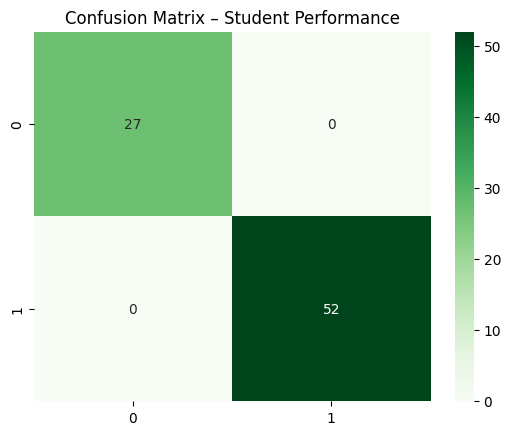

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Student Performance")
plt.show()

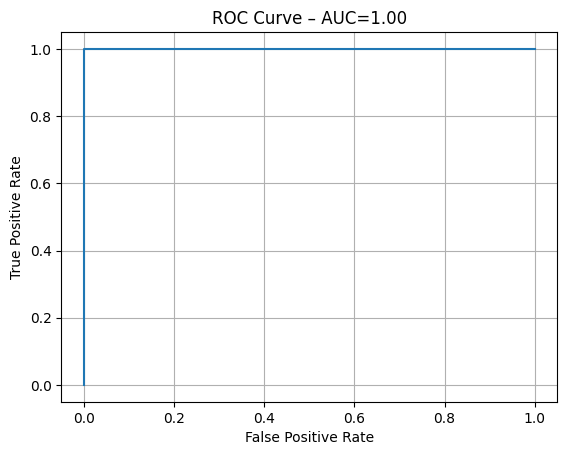

AUC Score: 1.0


In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title(f"ROC Curve – AUC={roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()
print("AUC Score:", roc_auc)

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("CV Scores:", cv)
print("Mean CV Accuracy:", cv.mean())

CV Scores: [0.97468354 1.         0.98734177 1.         1.        ]
Mean CV Accuracy: 0.9924050632911392


In [ ]:
for c in [0.01, 0.1, 1, 10]:
    m = LogisticRegression(C=c, max_iter=200)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    print(f"C={c}  Accuracy={accuracy_score(y_test, pred):.3f}")

C=0.01  Accuracy=0.949
C=0.1  Accuracy=0.987
C=1  Accuracy=1.000
C=10  Accuracy=1.000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Breast Cancer


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Week3/Evaluation_Metrics/data.csv")

In [4]:
# Remove unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

In [5]:
print(df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df["diagnosis"].value_counts())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [6]:
# Encode categorical target
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})  # M = Malignant(1), B = Benign(0)

In [7]:
#Split Data
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Train Model — Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42) # smaller depth = generalized / low variance
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
#  Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Model Evaluation:
Accuracy: 0.9122807017543859
Precision: 0.9444444444444444
Recall: 0.8095238095238095
F1 Score: 0.8717948717948718


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[70  2]
 [ 8 34]]


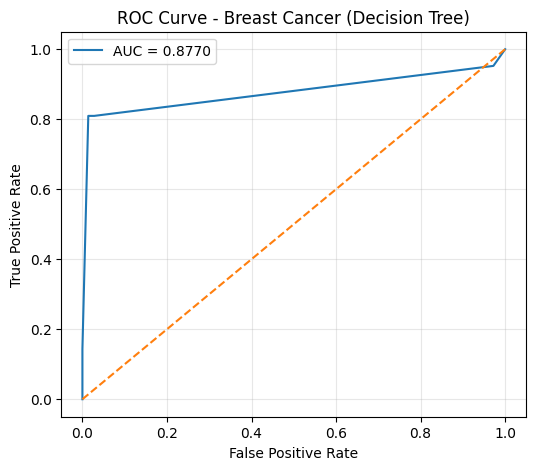

In [13]:
# ROC Curve + AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer (Decision Tree)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [14]:
# Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Accuracy:", cv_scores.mean(), " | Scores:", cv_scores)


Cross-Validation Accuracy: 0.9208818506443098  | Scores: [0.92105263 0.89473684 0.93859649 0.94736842 0.90265487]


In [15]:
# Bias–Variance Experiment (Compare Complex vs Simple Tree)
simple_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
complex_tree = DecisionTreeClassifier(max_depth=None, random_state=42)

simple_scores = cross_val_score(simple_tree, X, y, cv=5)
complex_scores = cross_val_score(complex_tree, X, y, cv=5)

print("\nBias–Variance Check:")
print("Simple Tree Avg Accuracy:", simple_scores.mean())
print("Complex Tree Avg Accuracy:", complex_scores.mean())


Bias–Variance Check:
Simple Tree Avg Accuracy: 0.9279614966620089
Complex Tree Avg Accuracy: 0.9173420276354604


Credit Card

In [16]:
#Credit Card Fraud Detection – KNN Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
#Load dataset
df = pd.read_csv("/content/drive/MyDrive/Week3/Evaluation_Metrics/creditcard.csv")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df["Class"].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [19]:
#Split X & y
X = df.drop("Class", axis=1)
y = df["Class"]

In [20]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
#Fix Imbalance using SMOTE (oversampling rare fraud cases)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE oversampling:")
print(y_train.value_counts())


After SMOTE oversampling:
Class
0    227451
1    227451
Name: count, dtype: int64


In [22]:
#Scale features (critical for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Train KNN Model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
#Predictions
y_pred = model.predict(X_test)

In [25]:
#Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nModel Evaluation (KNN – Fraud Detection):")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Model Evaluation (KNN – Fraud Detection):
Accuracy: 0.9980688880306169
Precision: 0.4659090909090909
Recall: 0.8367346938775511
F1 Score: 0.5985401459854015


In [26]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[56770    94]
 [   16    82]]


In [27]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[56770    94]
 [   16    82]]


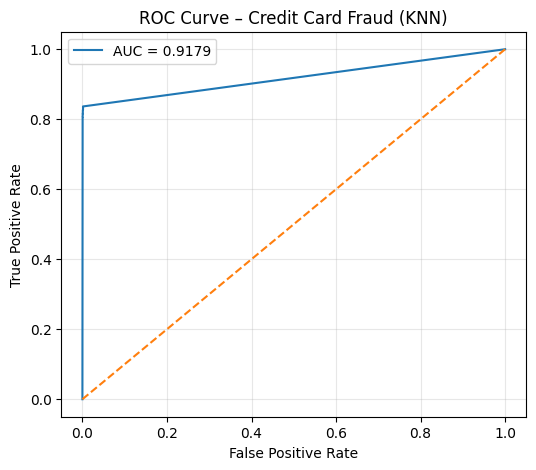

In [28]:
#ROC Curve + AUC
# KNN does NOT support predict_proba unless weights='distance'
model_prob = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_prob.fit(X_train, y_train)
y_prob = model_prob.predict_proba(X_test)[:, 1]

fpr, tpr, thr = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Credit Card Fraud (KNN)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [29]:
#Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Avg Accuracy:", cv_scores.mean(), "| Scores:", cv_scores)


Cross-Validation Avg Accuracy: 0.451985362546602 | Scores: [0.0304589  0.27836101 0.53468162 0.41814575 0.99827952]


Diabetes

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [31]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [32]:
#Replace zero-values in medical columns (they indicate missing)
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_cols] = df[zero_cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)
print("\nDataset shape:", df.shape)
print(df.describe())


Dataset shape: (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18

In [33]:
#Split Features & Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train SVM Model
model = SVC(kernel="rbf", probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [35]:
#Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation (SVM – Diabetes):")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)     # MOST IMPORTANT ⚠️
print("F1 Score:", f1)



Model Evaluation (SVM – Diabetes):
Accuracy: 0.7337662337662337
Precision: 0.6444444444444445
Recall: 0.5370370370370371
F1 Score: 0.5858585858585859


In [36]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[84 16]
 [25 29]]


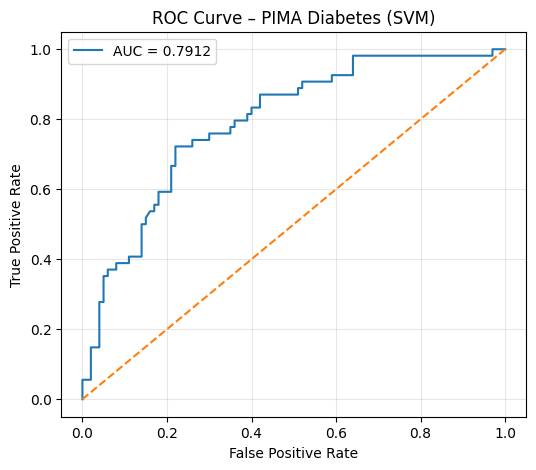

In [37]:
# ROC Curve + AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – PIMA Diabetes (SVM)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [38]:
#Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Avg Accuracy:", cv_scores.mean(), "| Scores:", cv_scores)


Cross-Validation Avg Accuracy: 0.7604872251931075 | Scores: [0.75974026 0.71428571 0.75324675 0.79084967 0.78431373]


In [39]:
#Bias–Variance Tradeoff (Compare C-parameter / model complexity)
simple_model = SVC(kernel="rbf", C=0.5, probability=True, random_state=42)
complex_model = SVC(kernel="rbf", C=5, probability=True, random_state=42)

simple_scores = cross_val_score(simple_model, X, y, cv=5)
complex_scores = cross_val_score(complex_model, X, y, cv=5)

print("\nBias–Variance Check:")
print("Simple Model Avg Accuracy:", simple_scores.mean())
print("Complex Model Avg Accuracy:", complex_scores.mean())


Bias–Variance Check:
Simple Model Avg Accuracy: 0.7513708513708514
Complex Model Avg Accuracy: 0.7695951107715813


Titanic Survival

In [40]:
# Titanic Survival Dataset – ML Evaluation using Decision Tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
#Load dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
print(df.head())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [43]:
#Feature Cleaning
df = df.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], errors='ignore')

In [44]:
# Fill missing age values with median (best for skewed data)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-425459562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-425459562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [45]:
#Encode Categorical Columns
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
print("\nAfter encoding columns:", df.columns)


After encoding columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [46]:
# Split Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [47]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
#Scaling (improves model stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Train model (Decision Tree)
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [50]:
# Predictions
y_pred = model.predict(X_test)
#Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nTitanic Model Evaluation:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Titanic Model Evaluation:
Accuracy: 0.7877094972067039
Precision: 0.8444444444444444
Recall: 0.5507246376811594
F1 Score: 0.6666666666666666


In [51]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[103   7]
 [ 31  38]]


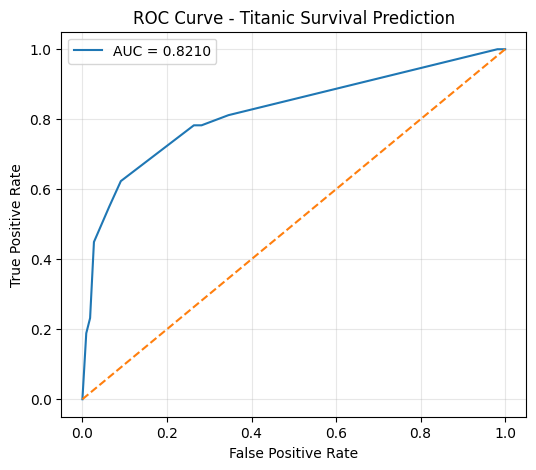

In [52]:
#ROC Curve + AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Titanic Survival Prediction")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [53]:
# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Avg Accuracy:", cv_scores.mean(), "| Scores:", cv_scores)


Cross-Validation Avg Accuracy: 0.805881614462369 | Scores: [0.76536313 0.8258427  0.80898876 0.78651685 0.84269663]


In [54]:
# Feature Engineering Impact Test
# Remove top feature 'Sex' (most impactful)
X_fe = df.drop(columns=["Survived", "Sex_male"], errors='ignore')
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y, test_size=0.2, random_state=42, stratify=y
)
X_train_fe = scaler.fit_transform(X_train_fe)
X_test_fe = scaler.transform(X_test_fe)

model_fe = DecisionTreeClassifier(max_depth=4, random_state=42)
model_fe.fit(X_train_fe, y_train_fe)
pred_fe = model_fe.predict(X_test_fe)
print("\nAccuracy WITHOUT Sex Feature:", accuracy_score(y_test_fe, pred_fe))


Accuracy WITHOUT Sex Feature: 0.6703910614525139
